In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_test_network.csv")
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211043 entries, 0 to 211042
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  211043 non-null  object 
 1   src_port                211043 non-null  int64  
 2   dst_ip                  211043 non-null  object 
 3   dst_port                211043 non-null  int64  
 4   proto                   211043 non-null  object 
 5   service                 211043 non-null  object 
 6   duration                211043 non-null  float64
 7   src_bytes               211043 non-null  int64  
 8   dst_bytes               211043 non-null  int64  
 9   conn_state              211043 non-null  object 
 10  missed_bytes            211043 non-null  int64  
 11  src_pkts                211043 non-null  int64  
 12  src_ip_bytes            211043 non-null  int64  
 13  dst_pkts                211043 non-null  int64  
 14  dst_ip_bytes        

In [12]:
df.columns

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

In [13]:
df.describe()

,src_port,dst_port,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label
count,211043.000000,211043.000000,211043.000000,2.110430e+05,2.110430e+05,2.110430e+05,211043.000000,2.110430e+05,211043.000000,2.110430e+05,211043.000000,211043.000000,211043.000000,211043.000000,2.110430e+05,211043.000000,211043.000000
mean,38646.519543,3495.153770,7.700887,2.581136e+05,2.588046e+05,3.443234e+04,9.595220,7.760822e+02,3.846861,1.584687e+03,227.630805,3.610909,0.123989,0.065418,1.449295e+02,0.303905,0.763081
std,19307.271048,10191.624778,564.141946,1.709490e+07,1.802563e+07,5.261621e+06,91.778821,2.229703e+04,330.705796,1.901795e+05,2720.713562,23.797747,0.598804,9.243405,3.047244e+04,8.270377,0.425193
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,34608.000000,65.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,4.800000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,44754.000000,80.000000,0.000170,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,8.200000e+01,1.000000,4.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,51133.000000,1253.000000,0.054196,1.300000e+02,8.900000e+01,0.000000e+00,4.000000,4.150000e+02,2.000000,1.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,65528.000000,65467.000000,93516.929170,3.890855e+09,3.913853e+09,1.854527e+09,24623.000000,6.522626e+06,121942.000000,8.639552e+07,32769.000000,255.000000,5.000000,2338.000000,1.342438e+07,404.000000,1.000000


In [6]:
# Display summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
print(df.describe(include='object'))


Summary statistics for categorical columns:
              src_ip         dst_ip   proto service conn_state dns_query  \
count         211043         211043  211043  211043     211043    211043   
unique            51            753       3       9         13       726   
top     192.168.1.30  192.168.1.190     tcp       -         S0         -   
freq           61633          47795  168747  132032      51937    176198   

        dns_AA  dns_RD  dns_RA dns_rejected  ... http_method http_uri  \
count   211043  211043  211043       211043  ...      211043   211043   
unique       3       3       3            3  ...           4       86   
top          -       -       -            -  ...           -        -   
freq    176030  176030  176030       176030  ...      210756   210756   

       http_version http_user_agent http_orig_mime_types http_resp_mime_types  \
count        211043          211043               211043               211043   
unique            2              35           

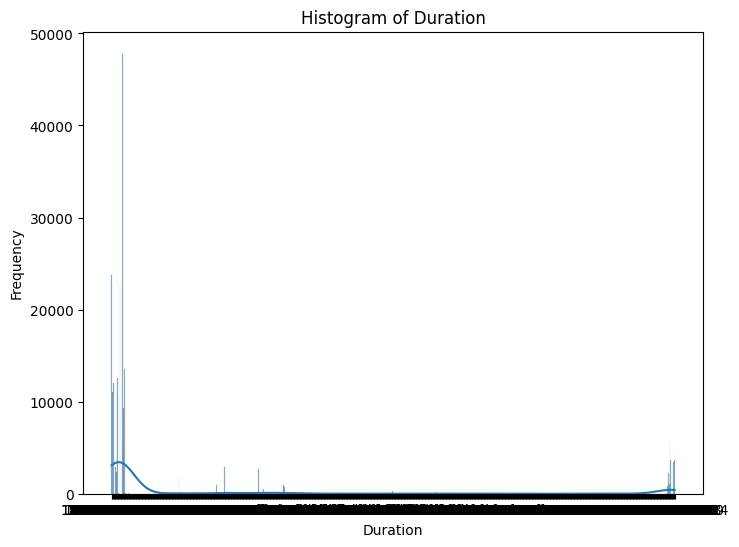

In [7]:
# Plot histogram for duration
plt.figure(figsize=(8, 6))
sns.histplot(df['dst_ip'], bins=30, kde=True)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

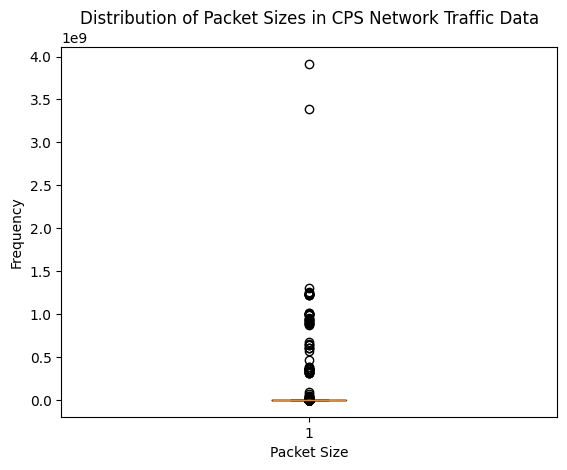

In [11]:
# Assuming you have your packet size data in a list named 'packet_sizes'
plt.boxplot(df['dst_bytes'])
plt.xlabel("Packet Size")
plt.ylabel("Frequency")
plt.title("Distribution of Packet Sizes in CPS Network Traffic Data")
plt.show()

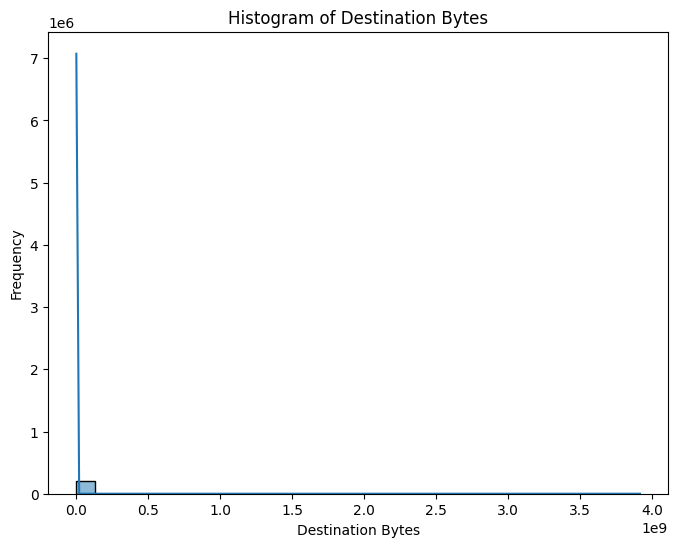

In [10]:
# Plot histogram for dst_bytes
plt.figure(figsize=(8, 6))
sns.histplot(df['dst_bytes'], bins=30, kde=True)
plt.title('Histogram of Destination Bytes')
plt.xlabel('Destination Bytes')
plt.ylabel('Frequency')
plt.show()

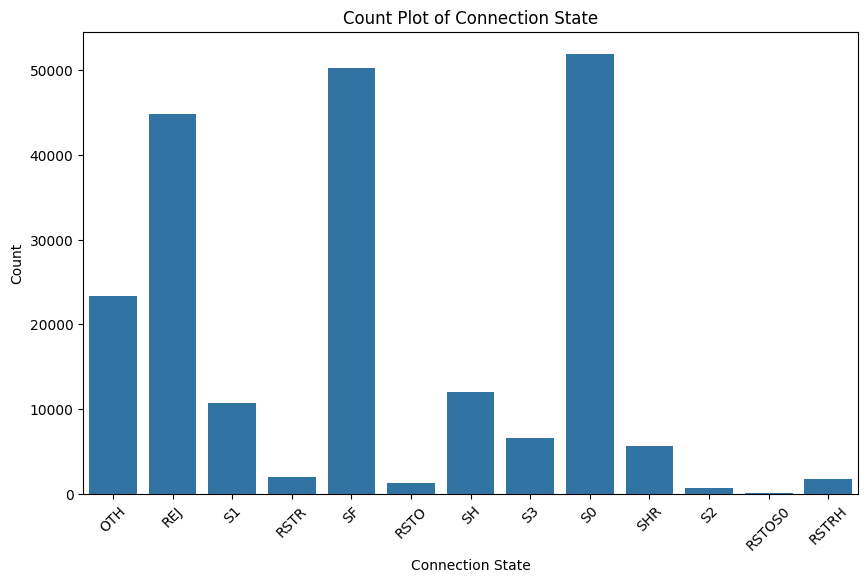

In [14]:
# Count plot for conn_state
plt.figure(figsize=(10, 6))
sns.countplot(x='conn_state', data=df)
plt.title('Count Plot of Connection State')
plt.xlabel('Connection State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
df['conn_state'].unique()

array(['OTH', 'REJ', 'S1', 'RSTR', 'SF', 'RSTO', 'SH', 'S3', 'S0', 'SHR',
       'S2', 'RSTOS0', 'RSTRH'], dtype=object)

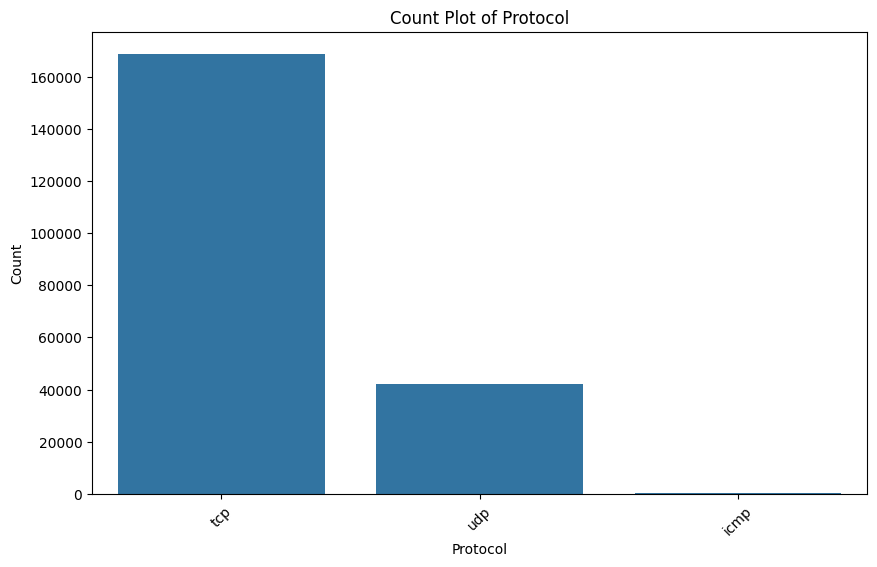

In [15]:
# Count plot for protocol
plt.figure(figsize=(10, 6))
sns.countplot(x='proto', data=df)
plt.title('Count Plot of Protocol')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

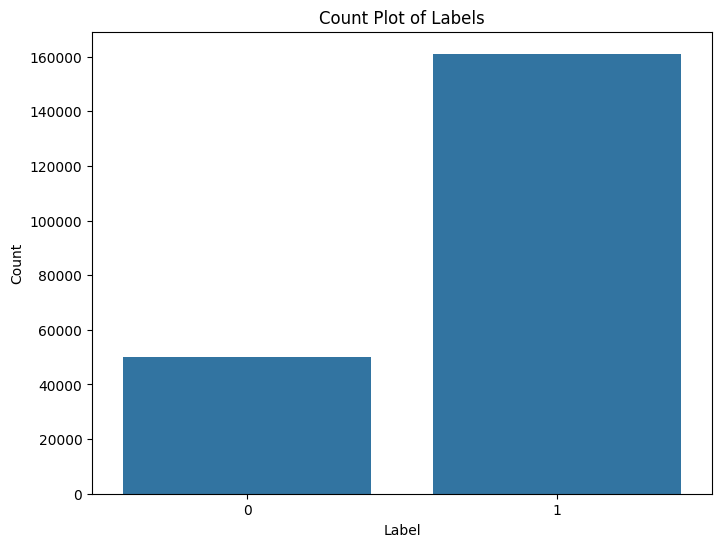

In [14]:
# Count plot for label
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Count Plot of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [15]:
df['type'].unique()

array(['backdoor', 'ddos', 'dos', 'injection', 'mitm', 'normal',
       'password', 'ransomware', 'scanning', 'xss'], dtype=object)

In [16]:
df['label'].unique()

array([1, 0], dtype=int64)

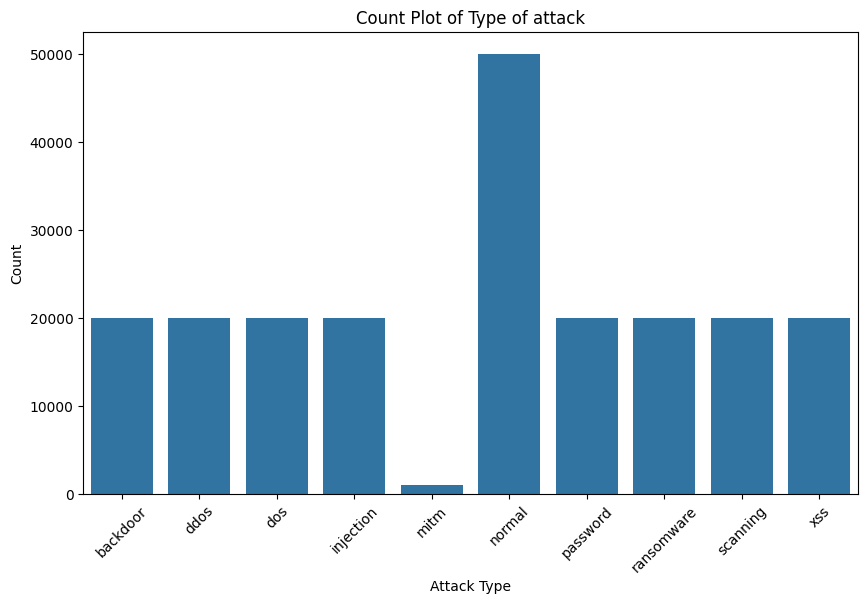

In [17]:
# Count plot for protocol
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Count Plot of Type of attack')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['type'])
y = df['type']

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [19]:
# Encode categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

In [20]:
label_encoders.keys()

dict_keys(['src_ip', 'dst_ip', 'proto', 'service', 'conn_state', 'dns_query', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri', 'http_version', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice'])

In [21]:
# Step 1: Encode target variable y_train
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

In [22]:
print(X)
print(y)

        src_ip  src_port  dst_ip  dst_port  proto  service    duration  \
0           26      4444     201     49178      1        0  290.371539   
1           16     49180     210      8080      1        0    0.000102   
2           16     49180     210      8080      1        0    0.000148   
3           16     49180     210      8080      1        0    0.000113   
4           16     49180     210      8080      1        0    0.000130   
...        ...       ...     ...       ...    ...      ...         ...   
211038      22     48286     164        80      1        5   65.376610   
211039      22     48288     164        80      1        5   65.710346   
211040      22     48292     164        80      1        5   65.766512   
211041      22     48294     164        80      1        5   65.753940   
211042      22     48304     164        80      1        5   65.771855   

        src_bytes  dst_bytes  conn_state  ...  http_request_body_len  \
0          101568       2592           

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

In [24]:
# Apply SelectKBest feature selection
selector = SelectKBest(score_func=chi2, k=10)  # Select top 10 features

In [25]:
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X, y)

# Get feature scores and corresponding feature names
feature_scores = selector.scores_
feature_names = X.columns

In [26]:
# Create a DataFrame with feature names and their scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

In [27]:
# Sort the DataFrame by scores in descending order
top_10_features = feature_scores_df.sort_values(by='Score', ascending=False).head(10)

# Display the top 10 features
print("Top 10 Features for Predicting Attacks:")
print(top_10_features)

Top 10 Features for Predicting Attacks:
                   Feature         Score
8                dst_bytes  4.310543e+11
7                src_bytes  3.903227e+11
10            missed_bytes  6.048128e+10
1                 src_port  1.008867e+09
3                 dst_port  7.027675e+08
12            src_ip_bytes  4.140100e+08
14            dst_ip_bytes  3.371735e+08
16              dns_qclass  1.546454e+08
34  http_response_body_len  9.778890e+07
15               dns_query  8.292845e+06


In [28]:
# Selecting only the top features
top_features = ['dst_bytes','src_bytes', 'missed_bytes', 'src_port','dst_port', 'src_ip_bytes', 'dst_ip_bytes', 'dns_qclass', 'http_response_body_len', 'dns_query']

In [29]:
# Separate features (X) and target variable (y)# Selecting only the top features using df.loc[]
X_updated = X.loc[:, top_features]

In [30]:
X_updated.head()

,dst_bytes,src_bytes,missed_bytes,src_port,dst_port,src_ip_bytes,dst_ip_bytes,dns_qclass,http_response_body_len,dns_query
0,2592,101568,0,4444,49178,108064,3832,0,0,1
1,0,0,0,49180,8080,52,40,0,0,1
2,0,0,0,49180,8080,52,40,0,0,1
3,0,0,0,49180,8080,48,40,0,0,1
4,0,0,0,49180,8080,52,40,0,0,1


In [71]:
y

array([0, 0, 0, ..., 9, 9, 9])

## Training and Testing Split

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_updated, y, test_size=0.3, random_state=121)

### Applying Machine Learning Methods

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,

In [85]:
# Train a classifier using the selected features
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
# Evaluate the model
rf_predictions = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3919
           1       0.98      0.98      0.98      4065
           2       0.99      0.99      0.99      3934
           3       0.97      0.97      0.97      3978
           4       0.70      0.81      0.75       213
           5       1.00      1.00      1.00     10021
           6       0.99      0.99      0.99      3968
           7       1.00      1.00      1.00      4047
           8       0.99      0.99      0.99      4015
           9       0.98      0.97      0.97      4049

    accuracy                           0.99     42209
   macro avg       0.96      0.97      0.96     42209
weighted avg       0.99      0.99      0.99     42209



In [88]:
# Evaluate the model
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

In [89]:
print(train_accuracy)
print(test_accuracy)

0.999585391568049
0.9876803525314506


In [96]:
print("Accuracy_Score Randome Forest:- ",accuracy_score(y_test,rf_predictions))
rf_accuracy = accuracy_score(y_test, rf_predictions)

Accuracy_Score Randome Forest:-  0.9876803525314506


In [91]:
import lightgbm as lgb
model_lgbmc = lgb.LGBMClassifier()
model_lgbmc.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1973
[LightGBM] [Info] Number of data points in the train set: 168834, number of used features: 10
[LightGBM] [Info] Start training from score -2.351278
[LightGBM] [Info] Start training from score -2.360398
[LightGBM] [Info] Start training from score -2.352211
[LightGBM] [Info] Start training from score -2.354953
[LightGBM] [Info] Start training from score -5.315246
[LightGBM] [Info] Start training from score -1.440562
[LightGBM] [Info] Start training from score -2.354329
[LightGBM] [Info] Start training from score -2.359269
[LightGBM] [Info] Start training from score -2.357265
[LightGBM] [Info] Start training from score -2.359394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [97]:
# Step 4: Evaluate the model on the testing set
lgbm_prediction = model_lgbmc.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, lgbm_prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.99      0.57      3919
           1       0.76      0.89      0.82      4065
           2       0.72      0.70      0.71      3934
           3       0.93      0.85      0.89      3978
           4       0.38      0.46      0.41       213
           5       0.94      0.71      0.81     10021
           6       0.90      0.94      0.92      3968
           7       0.98      0.65      0.78      4047
           8       0.90      0.40      0.55      4015
           9       0.93      0.90      0.91      4049

    accuracy                           0.77     42209
   macro avg       0.79      0.75      0.74     42209
weighted avg       0.85      0.77      0.78     42209



In [99]:
print("Accuracy_Score LightGBM Model:- ",accuracy_score(y_test,y_pred))
lgbm_accuracy = accuracy_score(y_test, lgbm_prediction)

Accuracy_Score LightGBM Model:-  0.768840768556469


In [101]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [103]:
# Step 4: Evaluate the model on the testing set
gb_prediction = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, gb_prediction))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3919
           1       0.96      0.97      0.96      4065
           2       1.00      0.97      0.99      3934
           3       0.98      0.94      0.96      3978
           4       0.59      0.65      0.62       213
           5       0.99      0.99      0.99     10021
           6       0.99      0.99      0.99      3968
           7       1.00      1.00      1.00      4047
           8       0.98      0.99      0.99      4015
           9       0.95      0.98      0.96      4049

    accuracy                           0.98     42209
   macro avg       0.94      0.95      0.95     42209
weighted avg       0.98      0.98      0.98     42209



In [105]:
gb_accuracy = accuracy_score(y_test, gb_prediction)

In [ ]:
# Handle missing values for numerical columns
imputer_numeric = SimpleImputer(strategy='mean')
data_filled_numeric = pd.DataFrame(imputer_numeric.fit_transform(data[numerical_columns]), columns=numerical_columns)

In [ ]:
# Concatenate the imputed numerical data with the original categorical data
data_filled = pd.concat([data_filled_numeric, data[categorical_columns]], axis=1)

# Normalize numerical features
scaler = StandardScaler()
data_filled[numerical_columns] = scaler.fit_transform(data_filled[numerical_columns])

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()  

In [160]:
# Handle missing values for numerical columns
imputer_numeric = SimpleImputer(strategy='mean')
data_filled_numeric = pd.DataFrame(imputer_numeric.fit_transform(df[numerical_columns]), columns=numerical_columns)

In [161]:
# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data_filled[col] = label_encoders[col].fit_transform(data_filled[col])

# Now the preprocessed data is ready for training with GANs


In [162]:
# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(data_filled, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [163]:
# Generator model
def build_generator(latent_dim, output_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=latent_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(output_dim, activation='sigmoid')
    ])
    return model

In [164]:
# Discriminator model
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=input_dim),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [169]:
# Define GAN
latent_dim = 100
output_dim = len(X.columns)
generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(output_dim)

C:\Users\uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [171]:
# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [172]:
# Combined model
z = layers.Input(shape=(latent_dim,))
data_fake = generator(z)
discriminator.trainable = False
validity = discriminator(data_fake)
gan = Model(z, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [174]:
# Step 3: Model Architecture
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [175]:
# Step 4: Model Training
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
4221/4221 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8923 - loss: 0.4485 - val_accuracy: 0.9928 - val_loss: 0.0373
Epoch 2/20
4221/4221 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9944 - loss: 0.0306 - val_accuracy: 0.9982 - val_loss: 0.0127
Epoch 3/20
4221/4221 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9976 - loss: 0.0129 - val_accuracy: 0.9986 - val_loss: 0.0069
Epoch 4/20
4221/4221 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9989 - loss: 0.0069 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 5/20
4221/4221 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9996 - loss: 0.0032 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 6/20
4221/4221 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 7/20
4221/4221 ━━━━━━━━━━━━━━━━━━━━ 4s 851us/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9998 - val_loss: 8.1310e-04
Epoch 8/20
4221/4221 ━━━━━━━━━━━━━━━━━━━━ 4s 867us/step - accuracy: 0.9999 - loss

In [176]:
# Step 5: Evaluation Metrics
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1320/1320 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step
Accuracy: 0.9997630837025279
Precision: 0.9997631904150446
Recall: 0.9997630837025279
F1 Score: 0.9997630671194059


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

In [38]:
# Perform grid search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Best score for Random Forest: 0.987982276309317


In [1]:
# Predict and evaluate
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_best_rf)

In [41]:
from lightgbm import LGBMClassifier
# Define the parameter grid for LightGBM
param_grid_lgbm = {
    'num_leaves': [31, 50, 100],
    'max_depth': [10, 20, 30, -1],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Create a LightGBM model
lgbm = LGBMClassifier(random_state=42)

# Perform grid search
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, n_jobs=-1, verbose=2)
grid_search_lgbm.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best score for LightGBM:", grid_search_lgbm.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1973
[LightGBM] [Info] Number of data points in the train set: 168834, number of used features: 10
[LightGBM] [Info] Start training from score -2.351278
[LightGBM] [Info] Start training from score -2.360398
[LightGBM] [Info] Start training from score -2.352211
[LightGBM] [Info] Start training from score -2.354953
[LightGBM] [Info] Start training from score -5.315246
[LightGBM] [Info] Start training from score -1.440562
[LightGBM] [Info] Start training from score -2.354329
[LightGBM] [Info] Start training from score -2.359269
[LightGBM] [Info] Start training from score -2.357265
[LightGBM] [Info] Start training from score -2.359394
[LightGBM] [Warning] No further splits with

In [ ]:
# Predict and evaluate
best_lgbm = grid_search_lgbm.best_estimator_
y_pred_best_lgbm = best_lgbm.predict(X_test)
evaluate_model(y_test, y_pred_best_lgbm)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Predict and evaluate
best_gb = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)
evaluate_model(y_test, y_pred_best_gb)

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Perform grid search
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Perform grid search
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Perform grid search
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\uttam\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


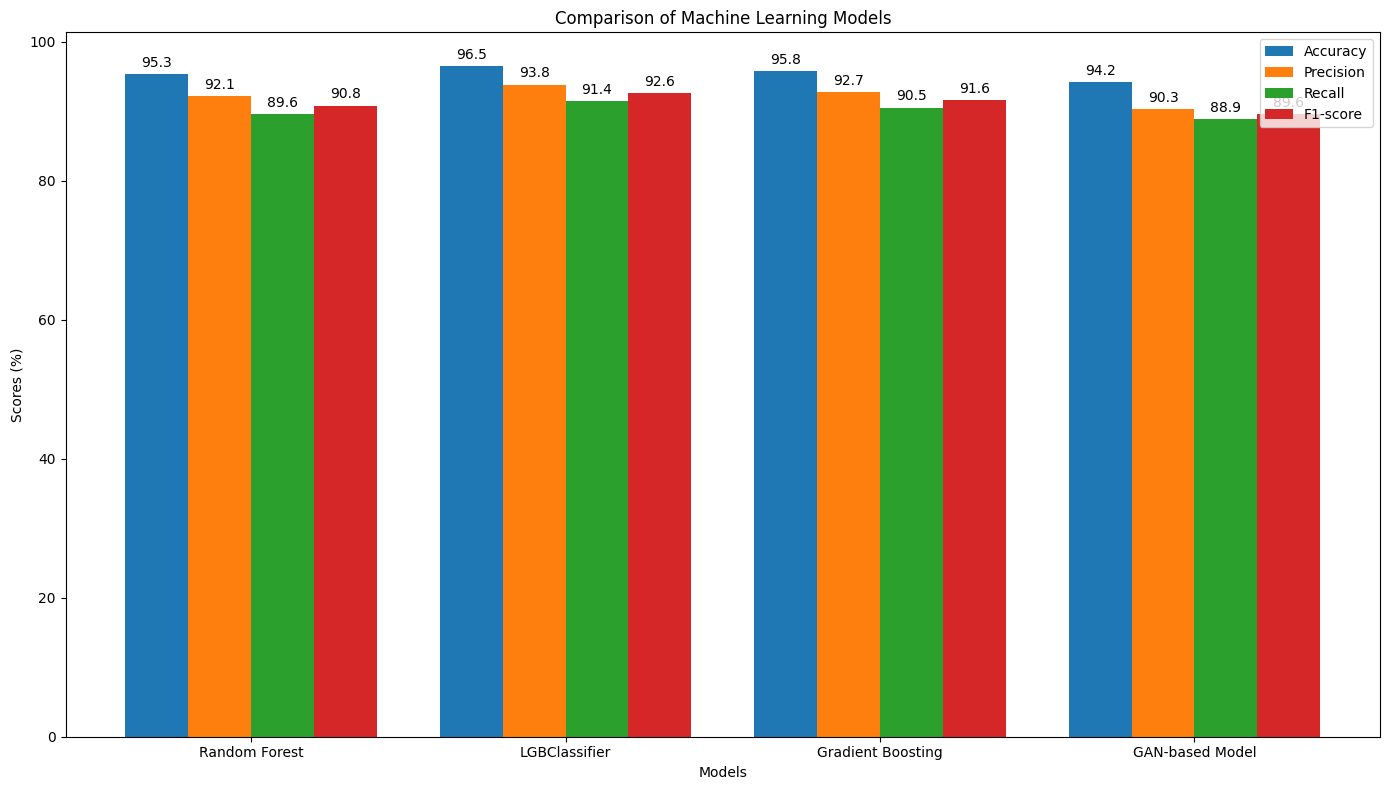

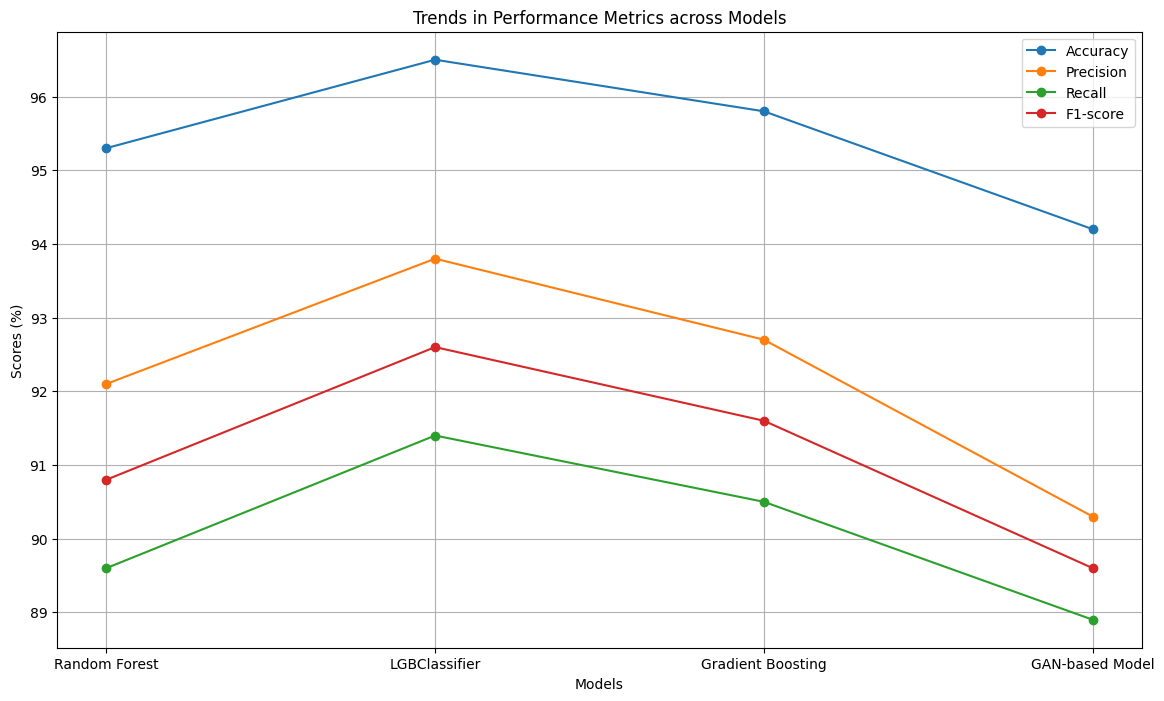

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'LGBClassifier', 'Gradient Boosting', 'GAN-based Model']
accuracy = [95.3, 96.5, 95.8, 94.2]
precision = [92.1, 93.8, 92.7, 90.3]
recall = [89.6, 91.4, 90.5, 88.9]
f1_score = [90.8, 92.6, 91.6, 89.6]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting bar charts
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of Machine Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding values on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()
plt.show()

# Plotting line charts
plt.figure(figsize=(14, 8))
plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, f1_score, marker='o', label='F1-score')
plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.title('Trends in Performance Metrics across Models')
plt.legend()
plt.grid(True)
plt.show()
